In [1]:
import pandas as pd
import numpy as np
# import plotly.express as px
# import plotly

# import matplotlib.animation as ani
# import matplotlib.pyplot as plt
from data_processing import DataProcessing

In [2]:

def add_month_yr(x:pd.DataFrame, date_columns: set):
    '''
    Adds a month_yr column to a dataframe that has a column
    containing date strings.
    '''
    for column in date_columns:
        if column in x:
            # print(pd.to_datetime(x[column]))
            # print(x[column])
            # x['datetime']=pd.to_datetime(x[column])
            x['month-yr']=pd.to_datetime(x[column]).dt.strftime('%b-%Y')
            return x
    raise TypeError

def fix_categorical(x):
    '''Changes 'month-yr' column to CategoricalDtype'''
    assert isinstance(x,pd.DataFrame)
    dates=pd.DataFrame(x['month-yr'])
    dates['Timestamp']=pd.to_datetime(x['month-yr'])
    dates=dates.sort_values(by=['Timestamp'])
    sorted=[]
    [sorted.append(x) for x in dates['month-yr'] if x not in sorted]
    t=pd.CategoricalDtype(categories=sorted,ordered=True)
    x['month-yr'] = pd.Series(x['month-yr'],dtype=t)
    return x

In [3]:
data_dir = 'data'
processor = DataProcessing(data_dir)
data_dict=processor.process()


In [92]:

layoffs_df=add_month_yr(data_dict['data/layoffs'],{'date'})
layoffs_tot=fix_categorical(layoffs_df[layoffs_df['month-yr'].notna()])
layoffs_tot=layoffs_tot[layoffs_tot.country=='United States']
# pd.DataFrame(layoffs_tot.drop(columns='country')
#             .groupby(['month-yr','industry'])
#             .sum().sort_values(by=['month-yr','percentage_laid_off'],ascending=[True,False]).get('percentage_laid_off')).reset_index().set_
layoffs_industry=(layoffs_tot.drop(['country','total_laid_off','funds_raised'],axis=1)
            .groupby(['industry','month-yr',]).sum()
            .reset_index())
[i for i in layoffs_industry.index]
layoffs_industry

/tmp/ipykernel_14309/84972462.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month-yr'] = pd.Series(x['month-yr'],dtype=t)
/tmp/ipykernel_14309/3974042459.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(['industry','month-yr',]).sum()


,industry,month-yr,percentage_laid_off
0,Aerospace,Mar-2020,0.00
1,Aerospace,Apr-2020,0.25
2,Aerospace,May-2020,0.00
3,Aerospace,Jun-2020,0.00
4,Aerospace,Jul-2020,0.00
...,...,...,...
1039,Travel,Oct-2022,0.00
1040,Travel,Nov-2022,0.22
1041,Travel,Dec-2022,0.00
1042,Travel,Jan-2023,0.29


{'Energy', 'Real Estate', 'Infrastructure', 'Security', 'Healthcare', 'Hardware', 'Recruiting', 'Retail', 'Logistics', 'Education', 'Consumer', 'Transportation', 'Construction', 'Food', 'Support', 'Fitness', 'Marketing', 'Aerospace', 'Media', 'Sales', 'Other', 'Product', 'Crypto', 'Finance', 'Manufacturing', 'Legal', 'Data', 'HR', 'Travel'}


<AxesSubplot: xlabel='month-yr'>

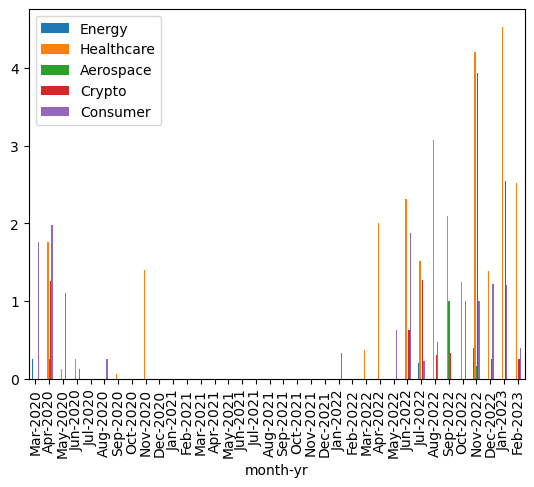

In [135]:
dfl=layoffs_industry.set_index('month-yr')
new_df=pd.DataFrame()
industries={i for i in dfl['industry']}
print(industries)
for i in industries:
    new_df.insert(len(new_df.columns), i, dfl[dfl['industry']==i]['percentage_laid_off'])
    # print(dfl[dfl['industry']==i]['percentage_laid_off'])
# new_df['month-yr']=(pd.Series([j for j in {i for i in layoffs_industry['month-yr']}]))

# for i in layoffs_industry.index:
#     # print(layoffs_industry.loc[i,:])
#     # print(layoffs_industry.iloc[i,0])
#     # print(layoffs_industry.iloc[i,1])
#     # print(layoffs_industry.iloc[i,2])
    # new_df[layoffs_industry.iloc[i,1],layoffs_industry.iloc[i,0]]=layoffs_industry.iloc[i,2]
new_df.plot(y= ['Energy','Healthcare','Aerospace','Crypto','Consumer'],kind='bar')
